<a href="https://colab.research.google.com/github/Gahan25/CVIP-Datascienceintern/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from wordcloud import WordCloud
import plotly.offline as py
import plotly.graph_objs as go

# Load the terrorism dataset
terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# Data Cleaning and Preparation
terror.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'provstate': 'state',
                       'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 'nkill': 'Killed',
                       'nwound': 'Wounded', 'summary': 'Summary', 'gname': 'Group', 'targtype1_txt': 'Target_type',
                       'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'}, inplace=True)
terror = terror[['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city', 'latitude', 'longitude', 'AttackType', 'Killed',
               'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]


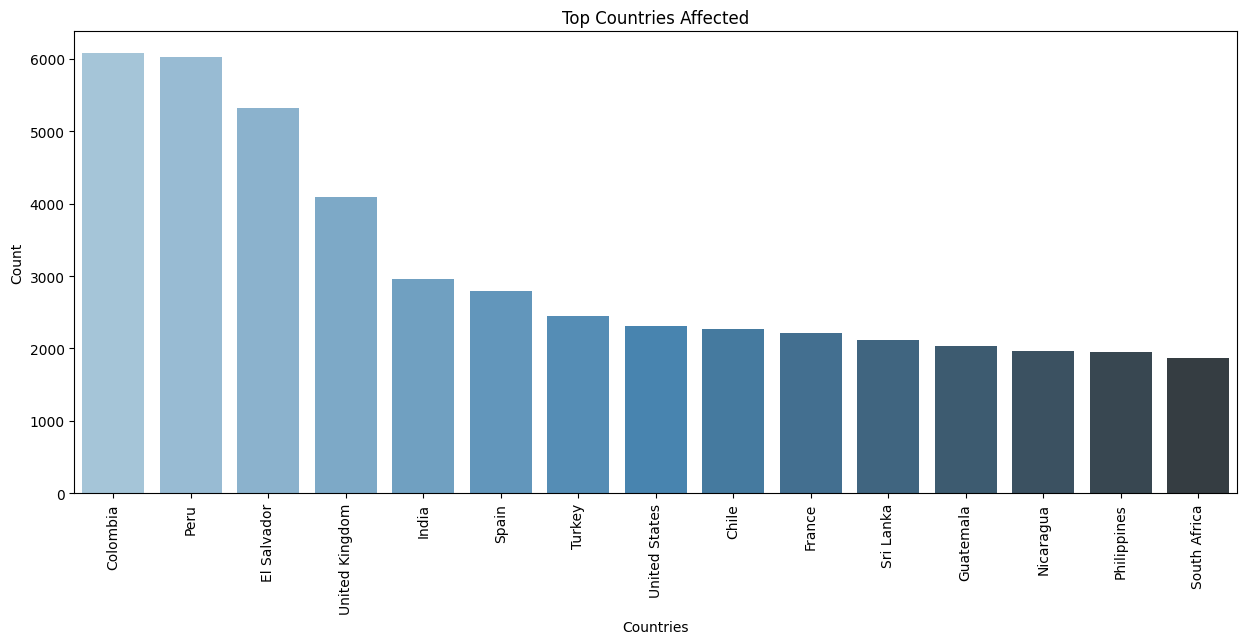

In [ ]:

# Visualization Functions
def create_bar_plot(x, y, xlabel, ylabel, title, rotation=0):
    plt.subplots(figsize=(15, 6))
    sns.barplot(x=x, y=y, palette='Blues_d')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

# Visualizations
create_bar_plot(terror['Country'].value_counts()[:15].index, terror['Country'].value_counts()[:15].values,
                'Countries', 'Count', 'Top Countries Affected', rotation=90)

# Map Visualization
filterYear = terror['Year'] >= 1970  # Adjust the year filter
filterData = terror[filterYear].dropna(subset=['latitude', 'longitude', 'city'])

# Filter out rows with non-numeric latitude and longitude values
filterData = filterData[filterData['latitude'].apply(lambda x: isinstance(x, (int, float)))]
filterData = filterData[filterData['longitude'].apply(lambda x: isinstance(x, (int, float)))]

m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(m1)
for i in range(len(filterData)):
    folium.Marker([filterData.iloc[i]['latitude'], filterData.iloc[i]['longitude']],
                  popup=filterData.iloc[i]['city']).add_to(markerCluster)


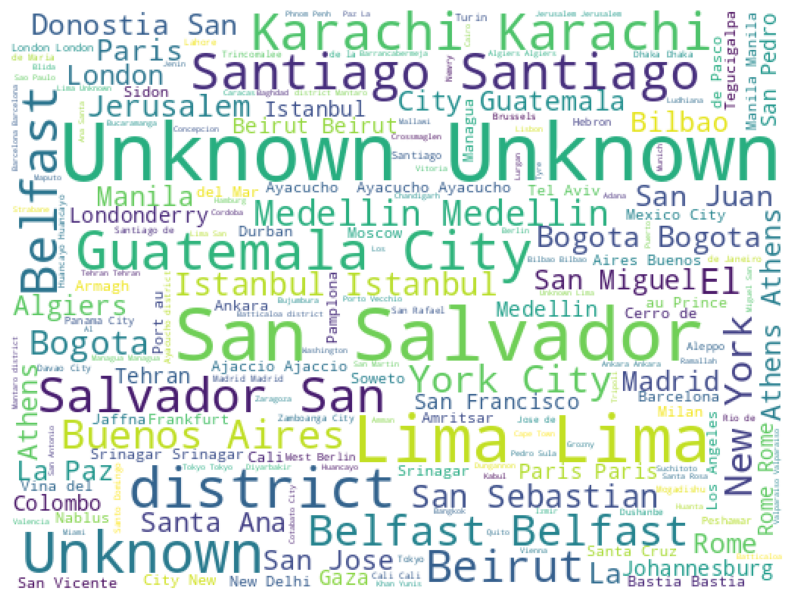

In [ ]:
# Word Cloud
cities = terror['city'].dropna()
plt.subplots(figsize=(10, 10))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

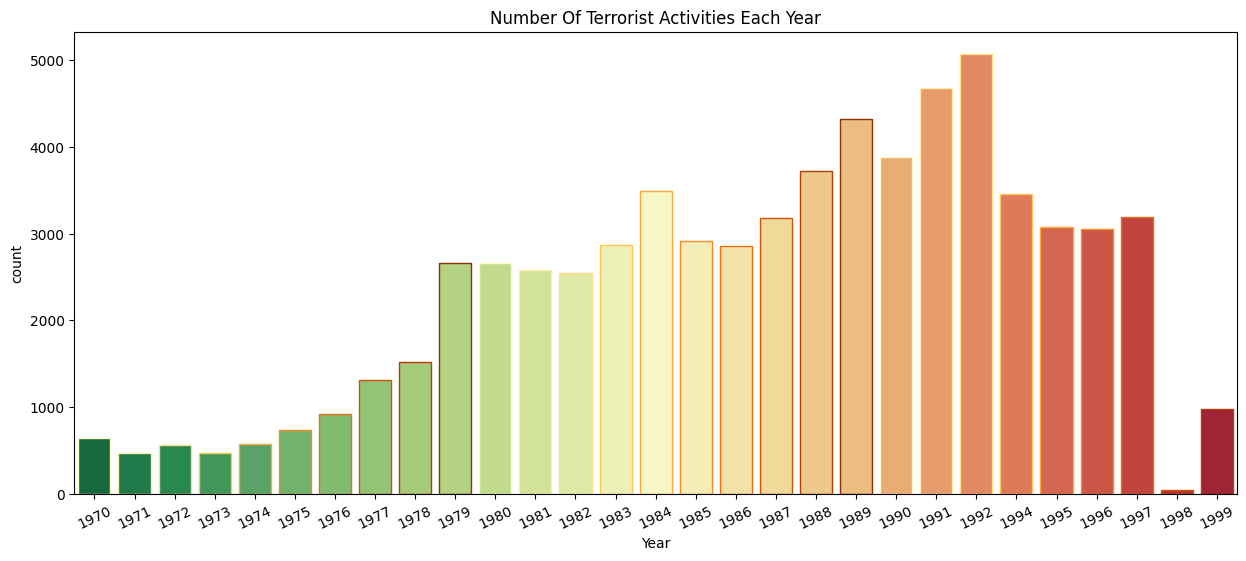

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=25)

plt.title('Number Of Terrorist Activities Each Year')
plt.show()

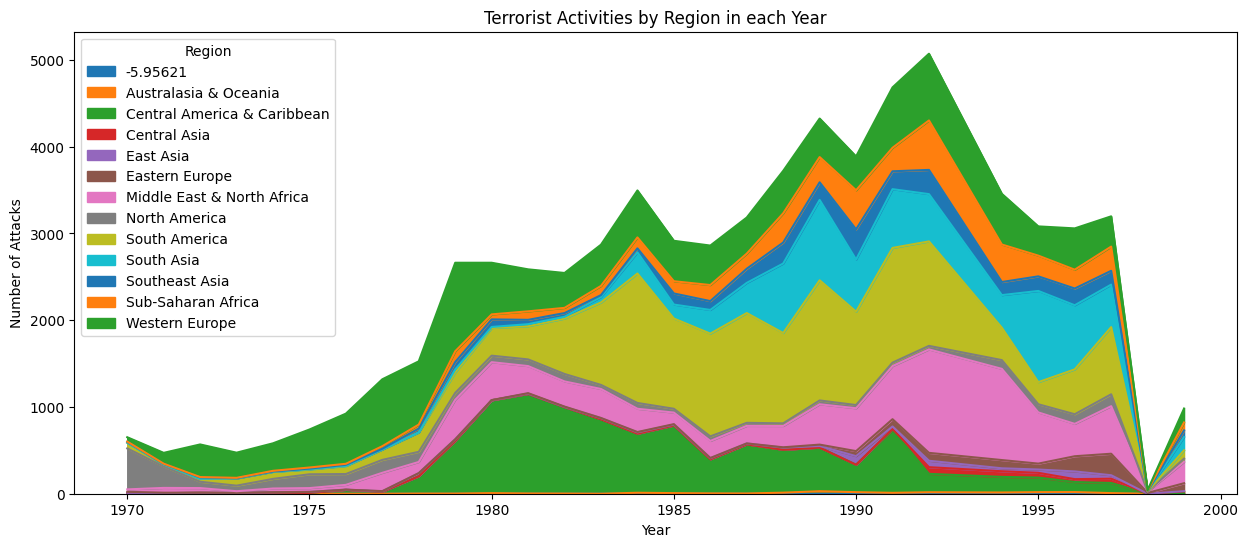

In [ ]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
# Interactive Heatmap using Plotly
heat = terror.pivot_table(index='Country', columns='Year', values='Killed', aggfunc='sum', fill_value=0)

# Update the years range from 1970 to 2017
years_range = list(range(1970, 2018))

# Extend the columns of the DataFrame to include missing years
missing_years = set(years_range) - set(heat.columns)
for year in missing_years:
    heat[year] = 0

heat = heat[years_range]  # Reorder columns to match the years range

colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7'], [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1970 to 2017',  # Update the title
    xaxis=dict(ticks='', nticks=len(years_range)),  # Adjust the x-axis ticks and nticks
    yaxis=dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)


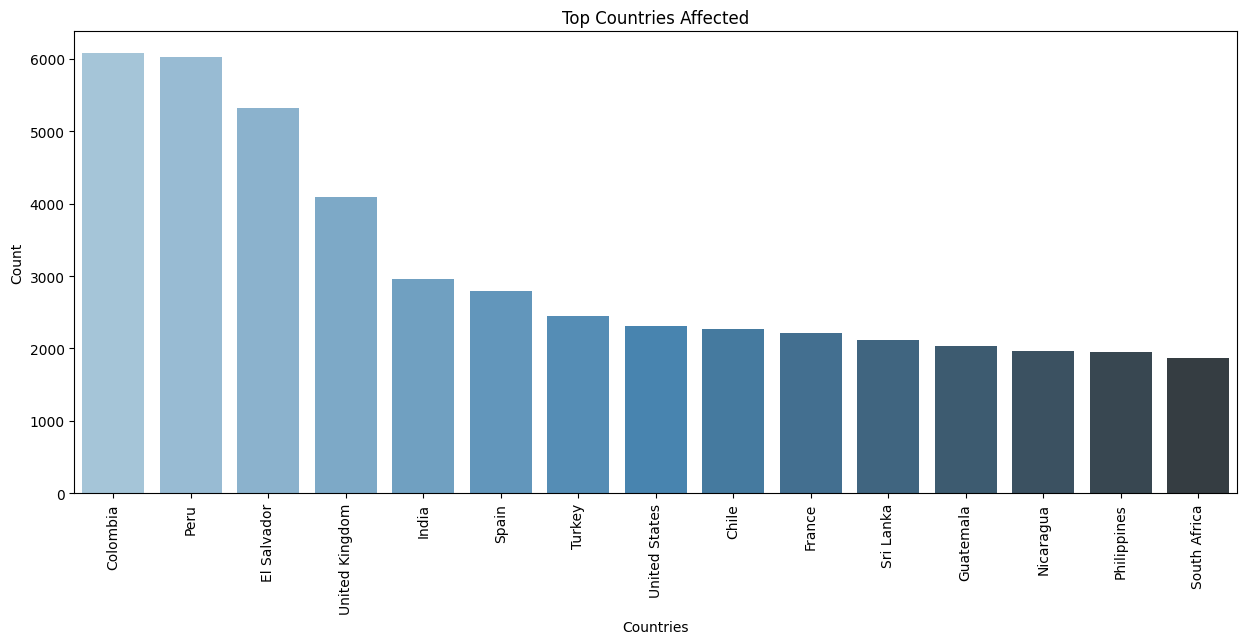

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15, 6))
sns.barplot(x=terror['Country'].value_counts()[:15].index,
            y=terror['Country'].value_counts()[:15].values,
            palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values
# Let's look at what types of attacks these deaths were made of.
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

Number of people killed by terror attack: 135411


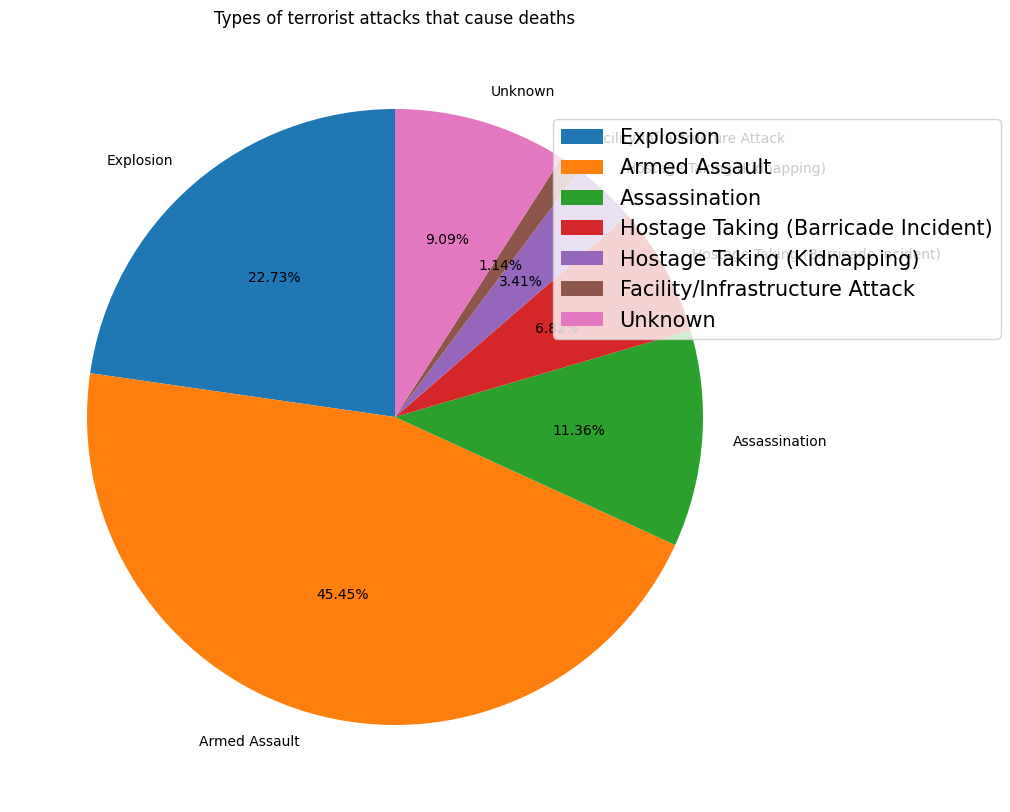

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined typeKillFormatData, labels, and transpoze
# For the purpose of this example, I'm providing some sample data

# Sample data for demonstration
labels = ['Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Unknown']
transpoze = [[1000, 2000, 500, 300, 150, 50, 400]]  # Sample data

values = transpoze[0]  # Flatten the 2D array into a 1D list

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, labels=labels, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)
plt.show()

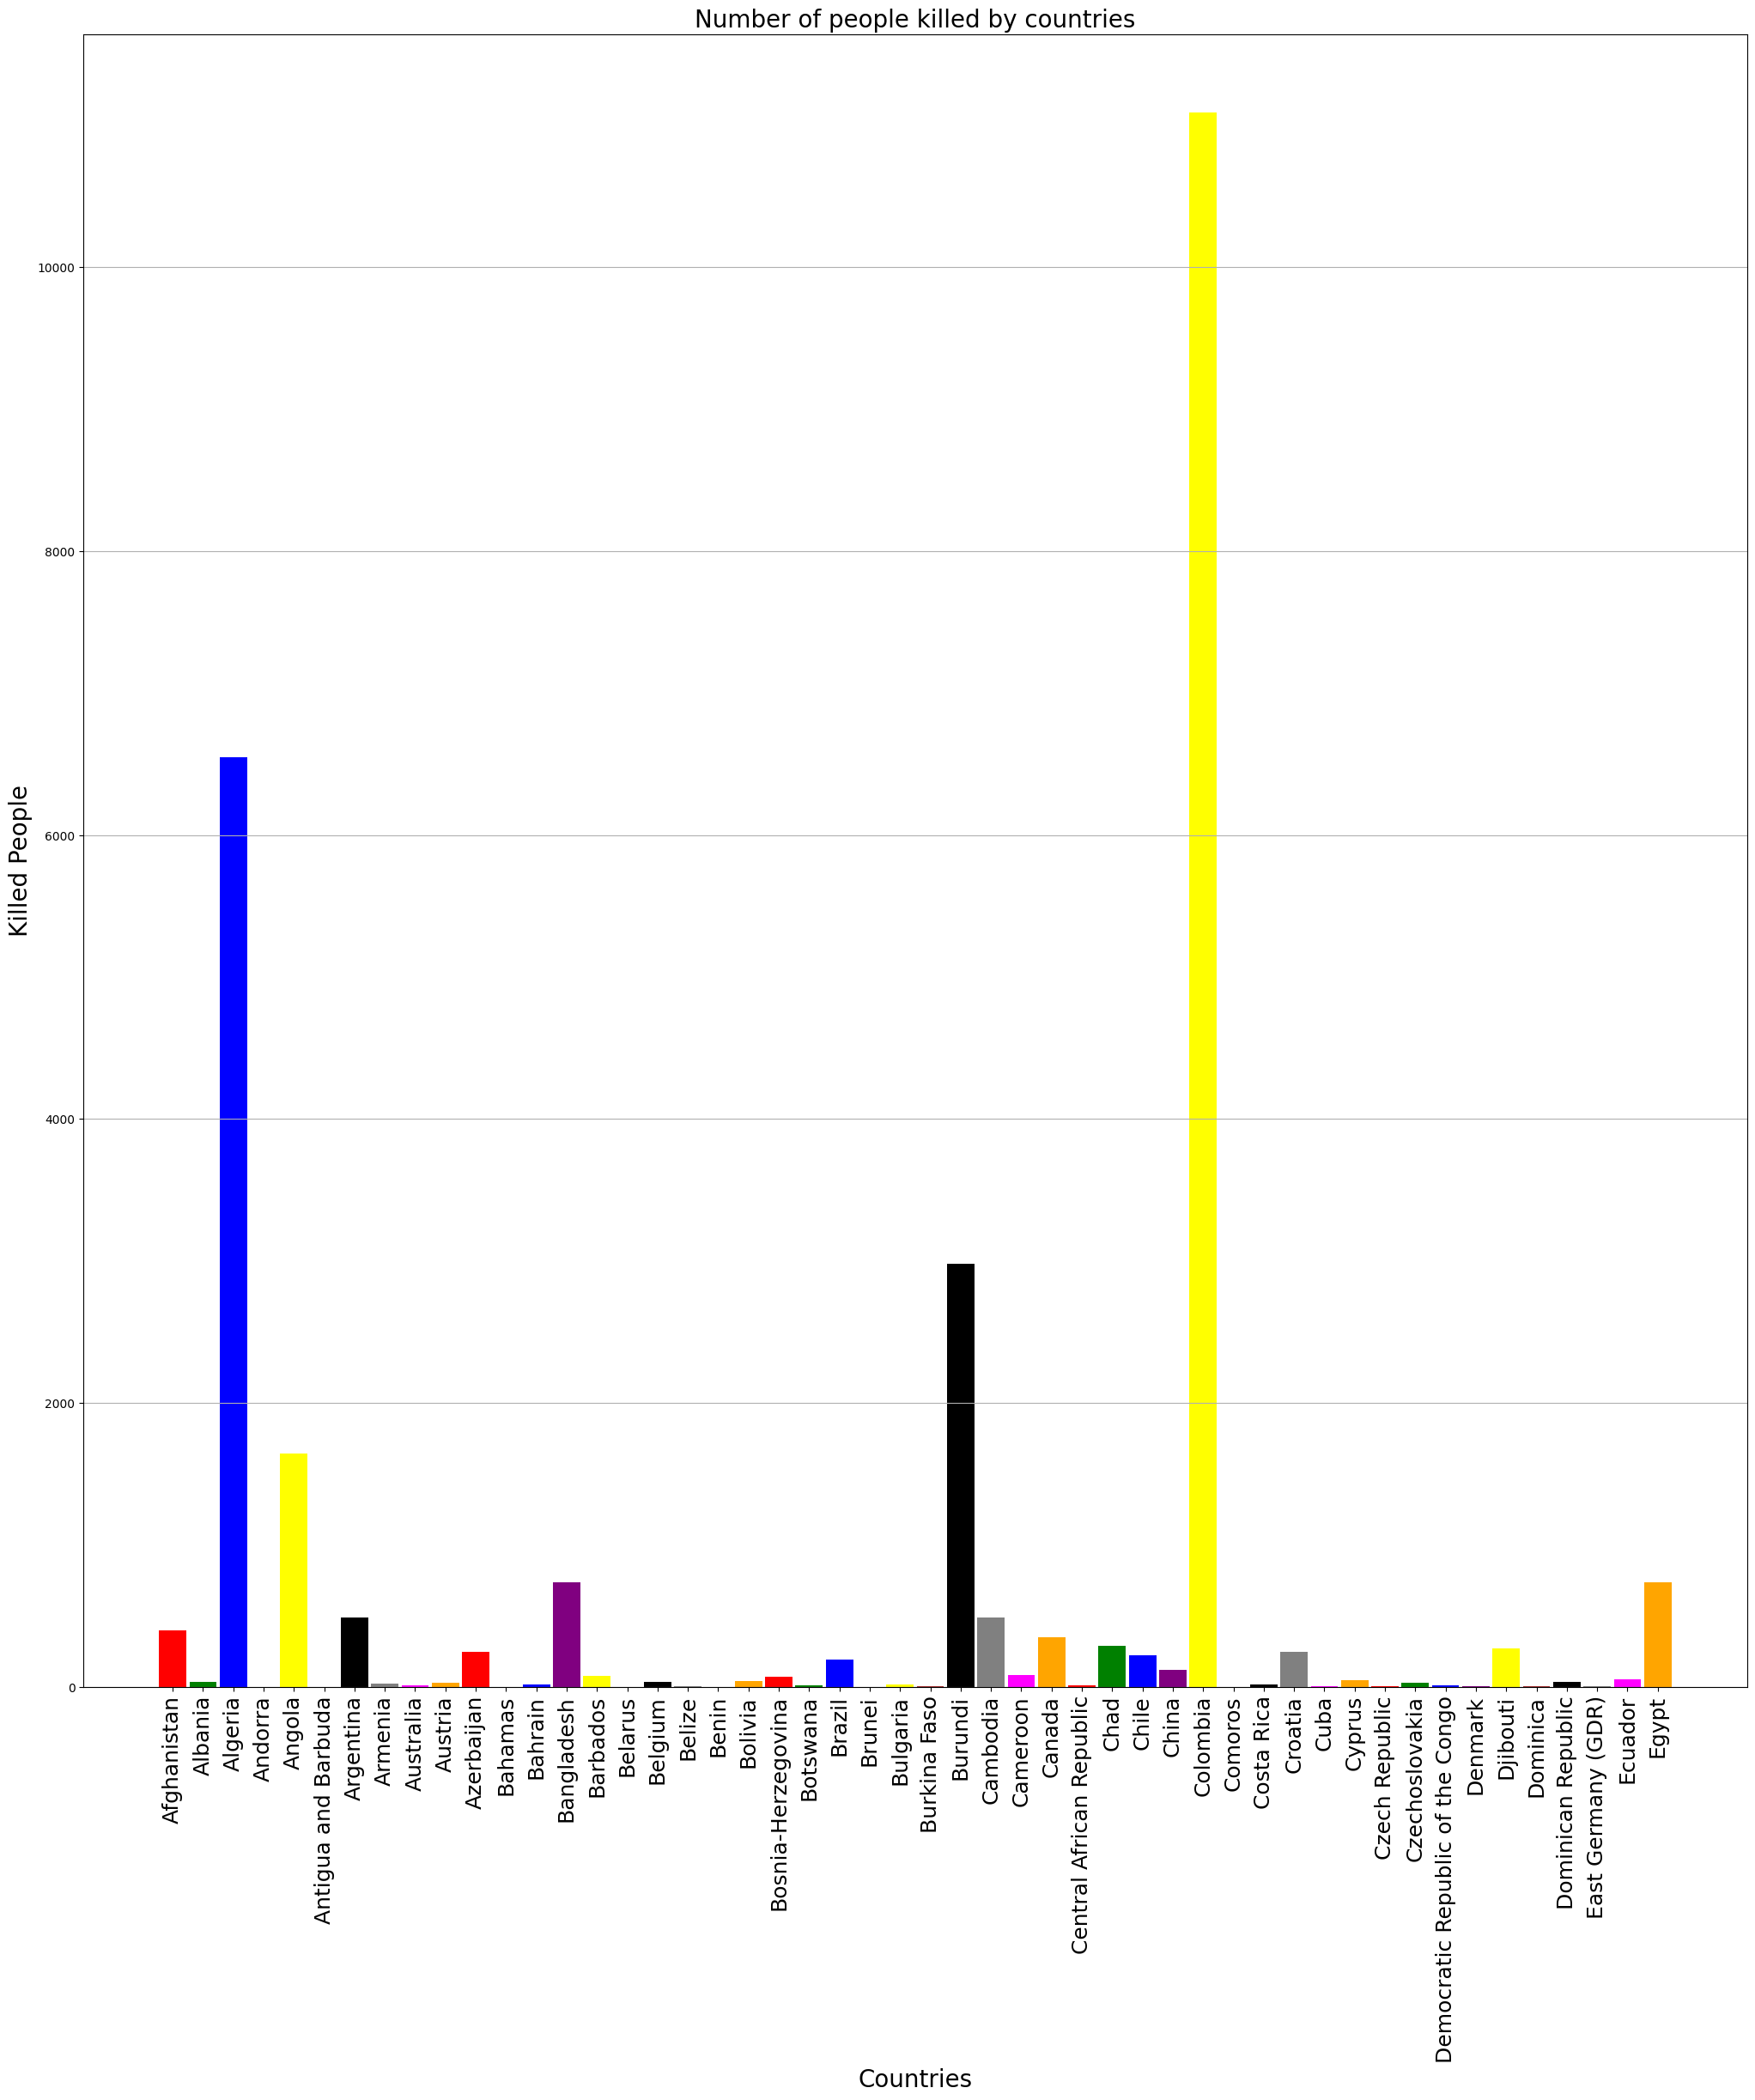

In [ ]:
# Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:, 'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

labels = countryKillFormatData.columns.tolist()
labels = labels[:50]  # 50 bars provide a nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]  # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color=colors, width=0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize=20)
# print(fig_size)
plt.show()


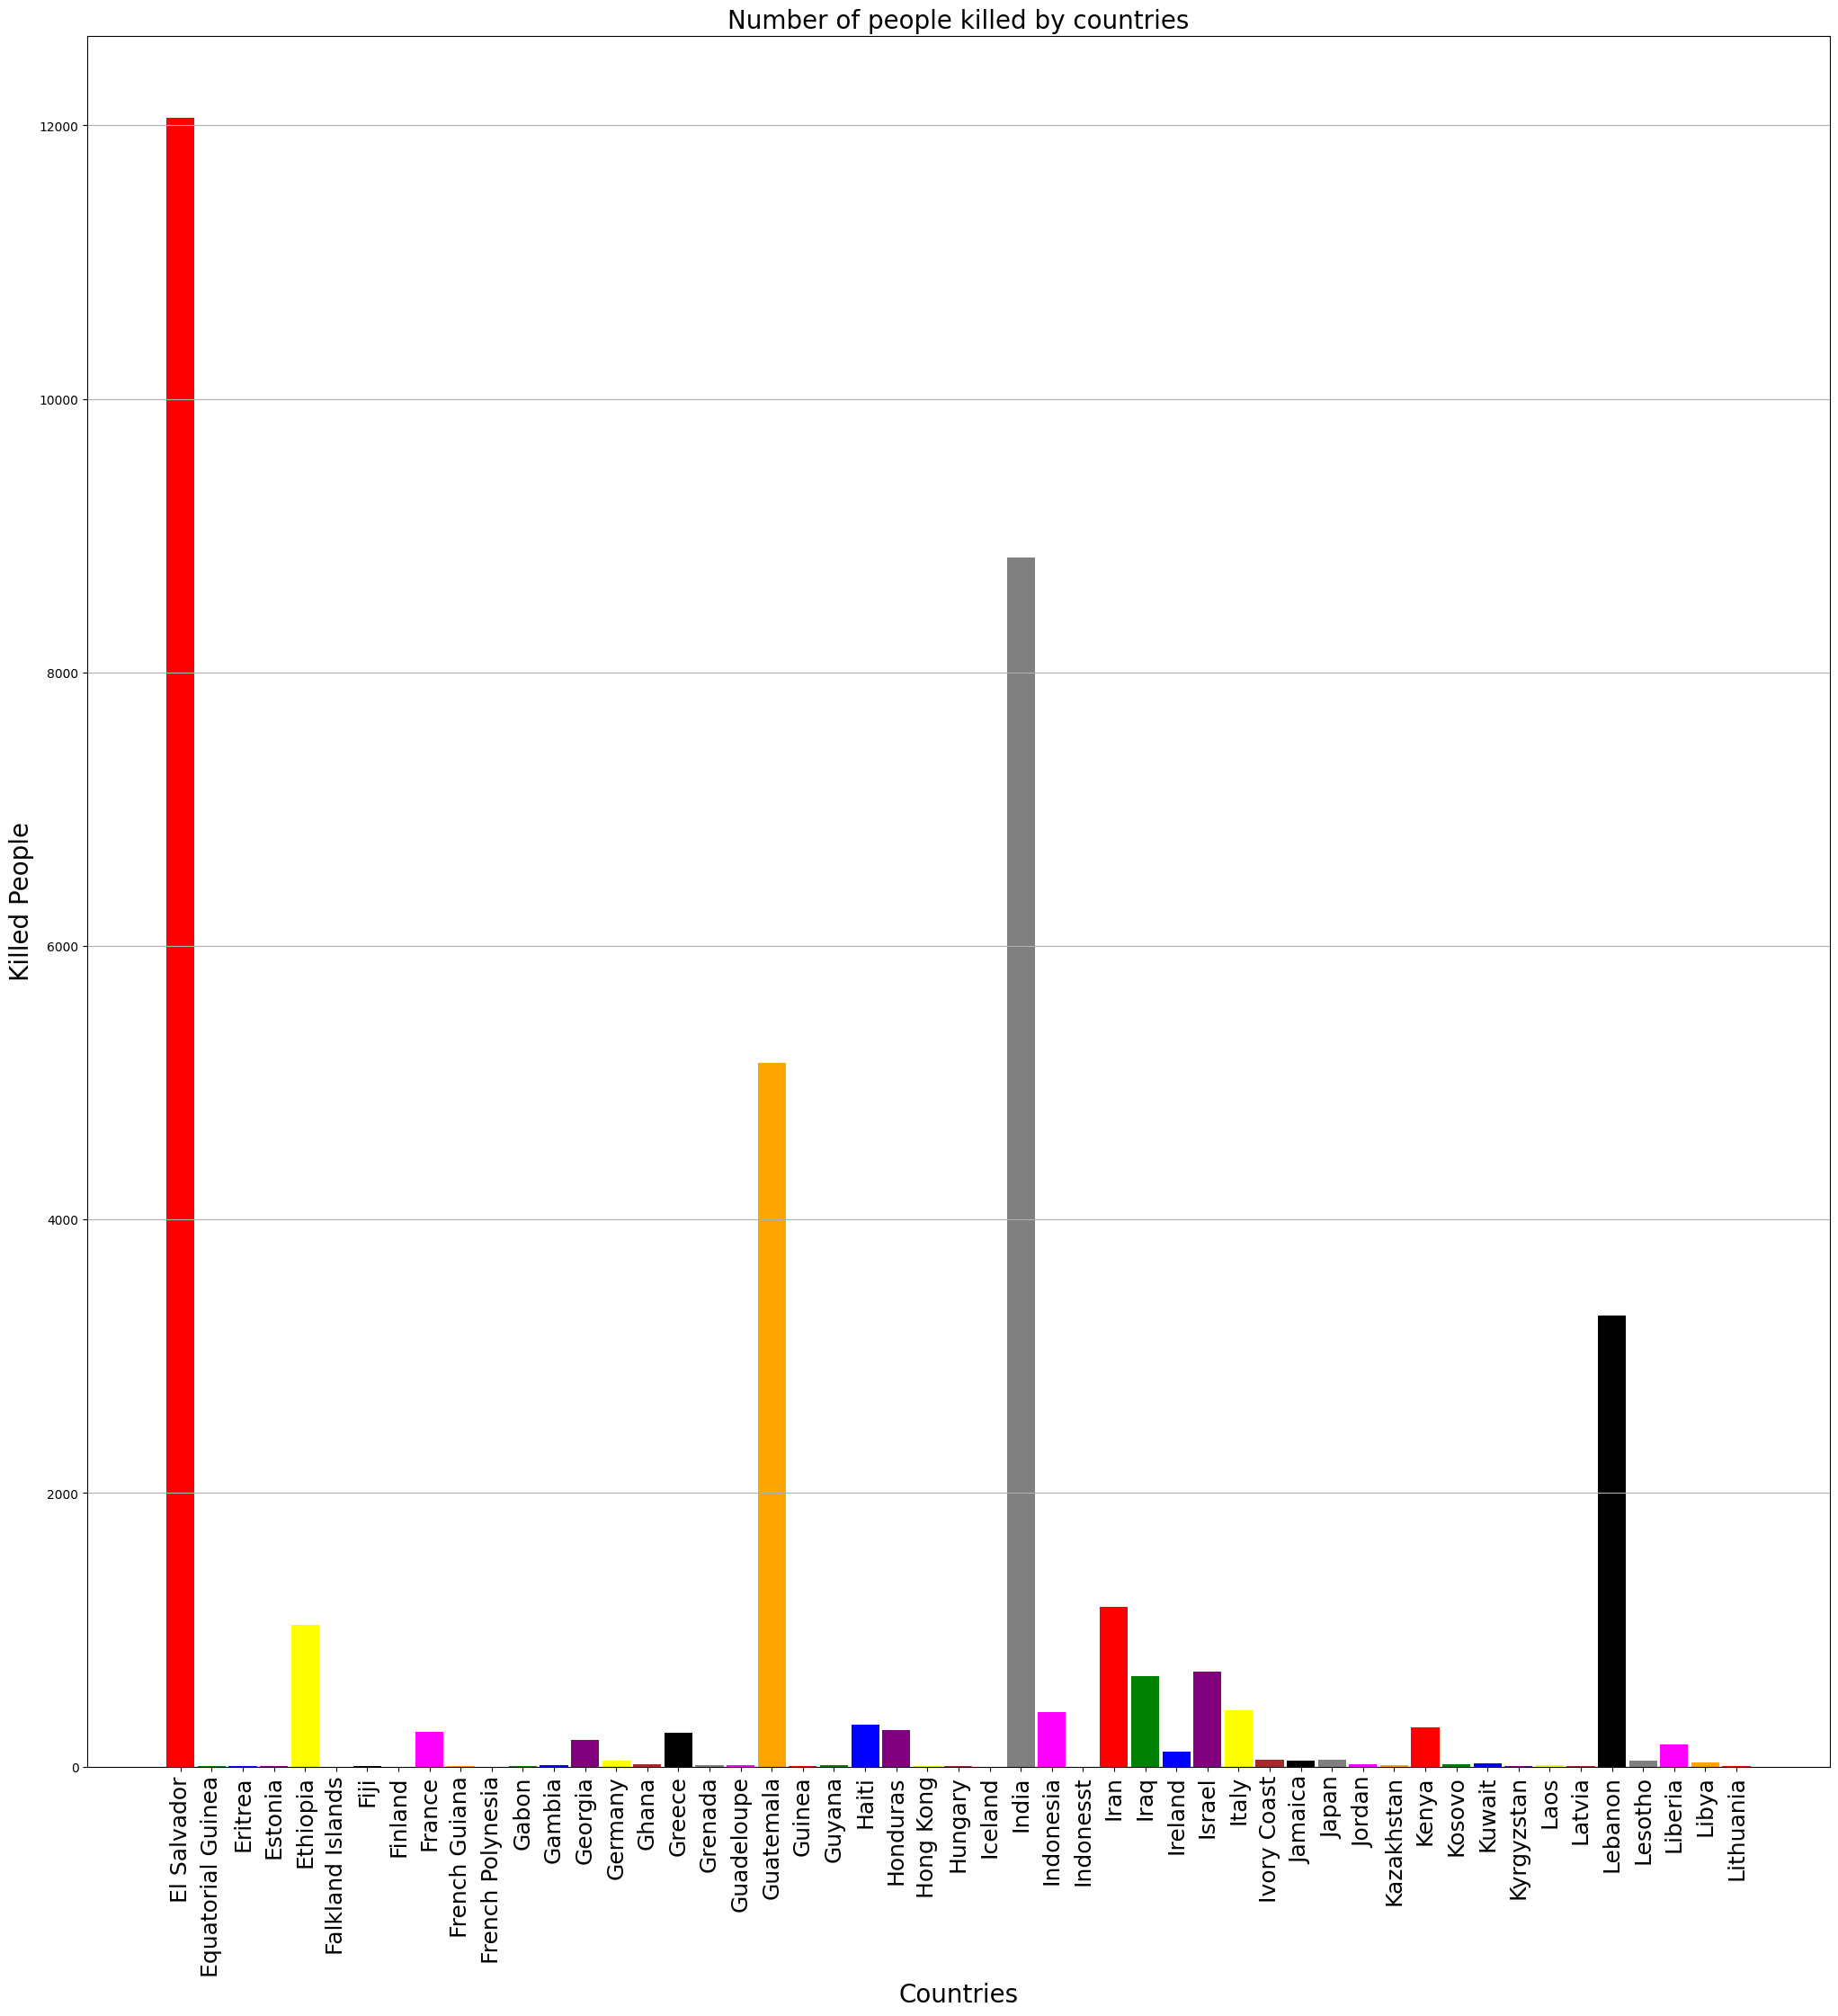

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

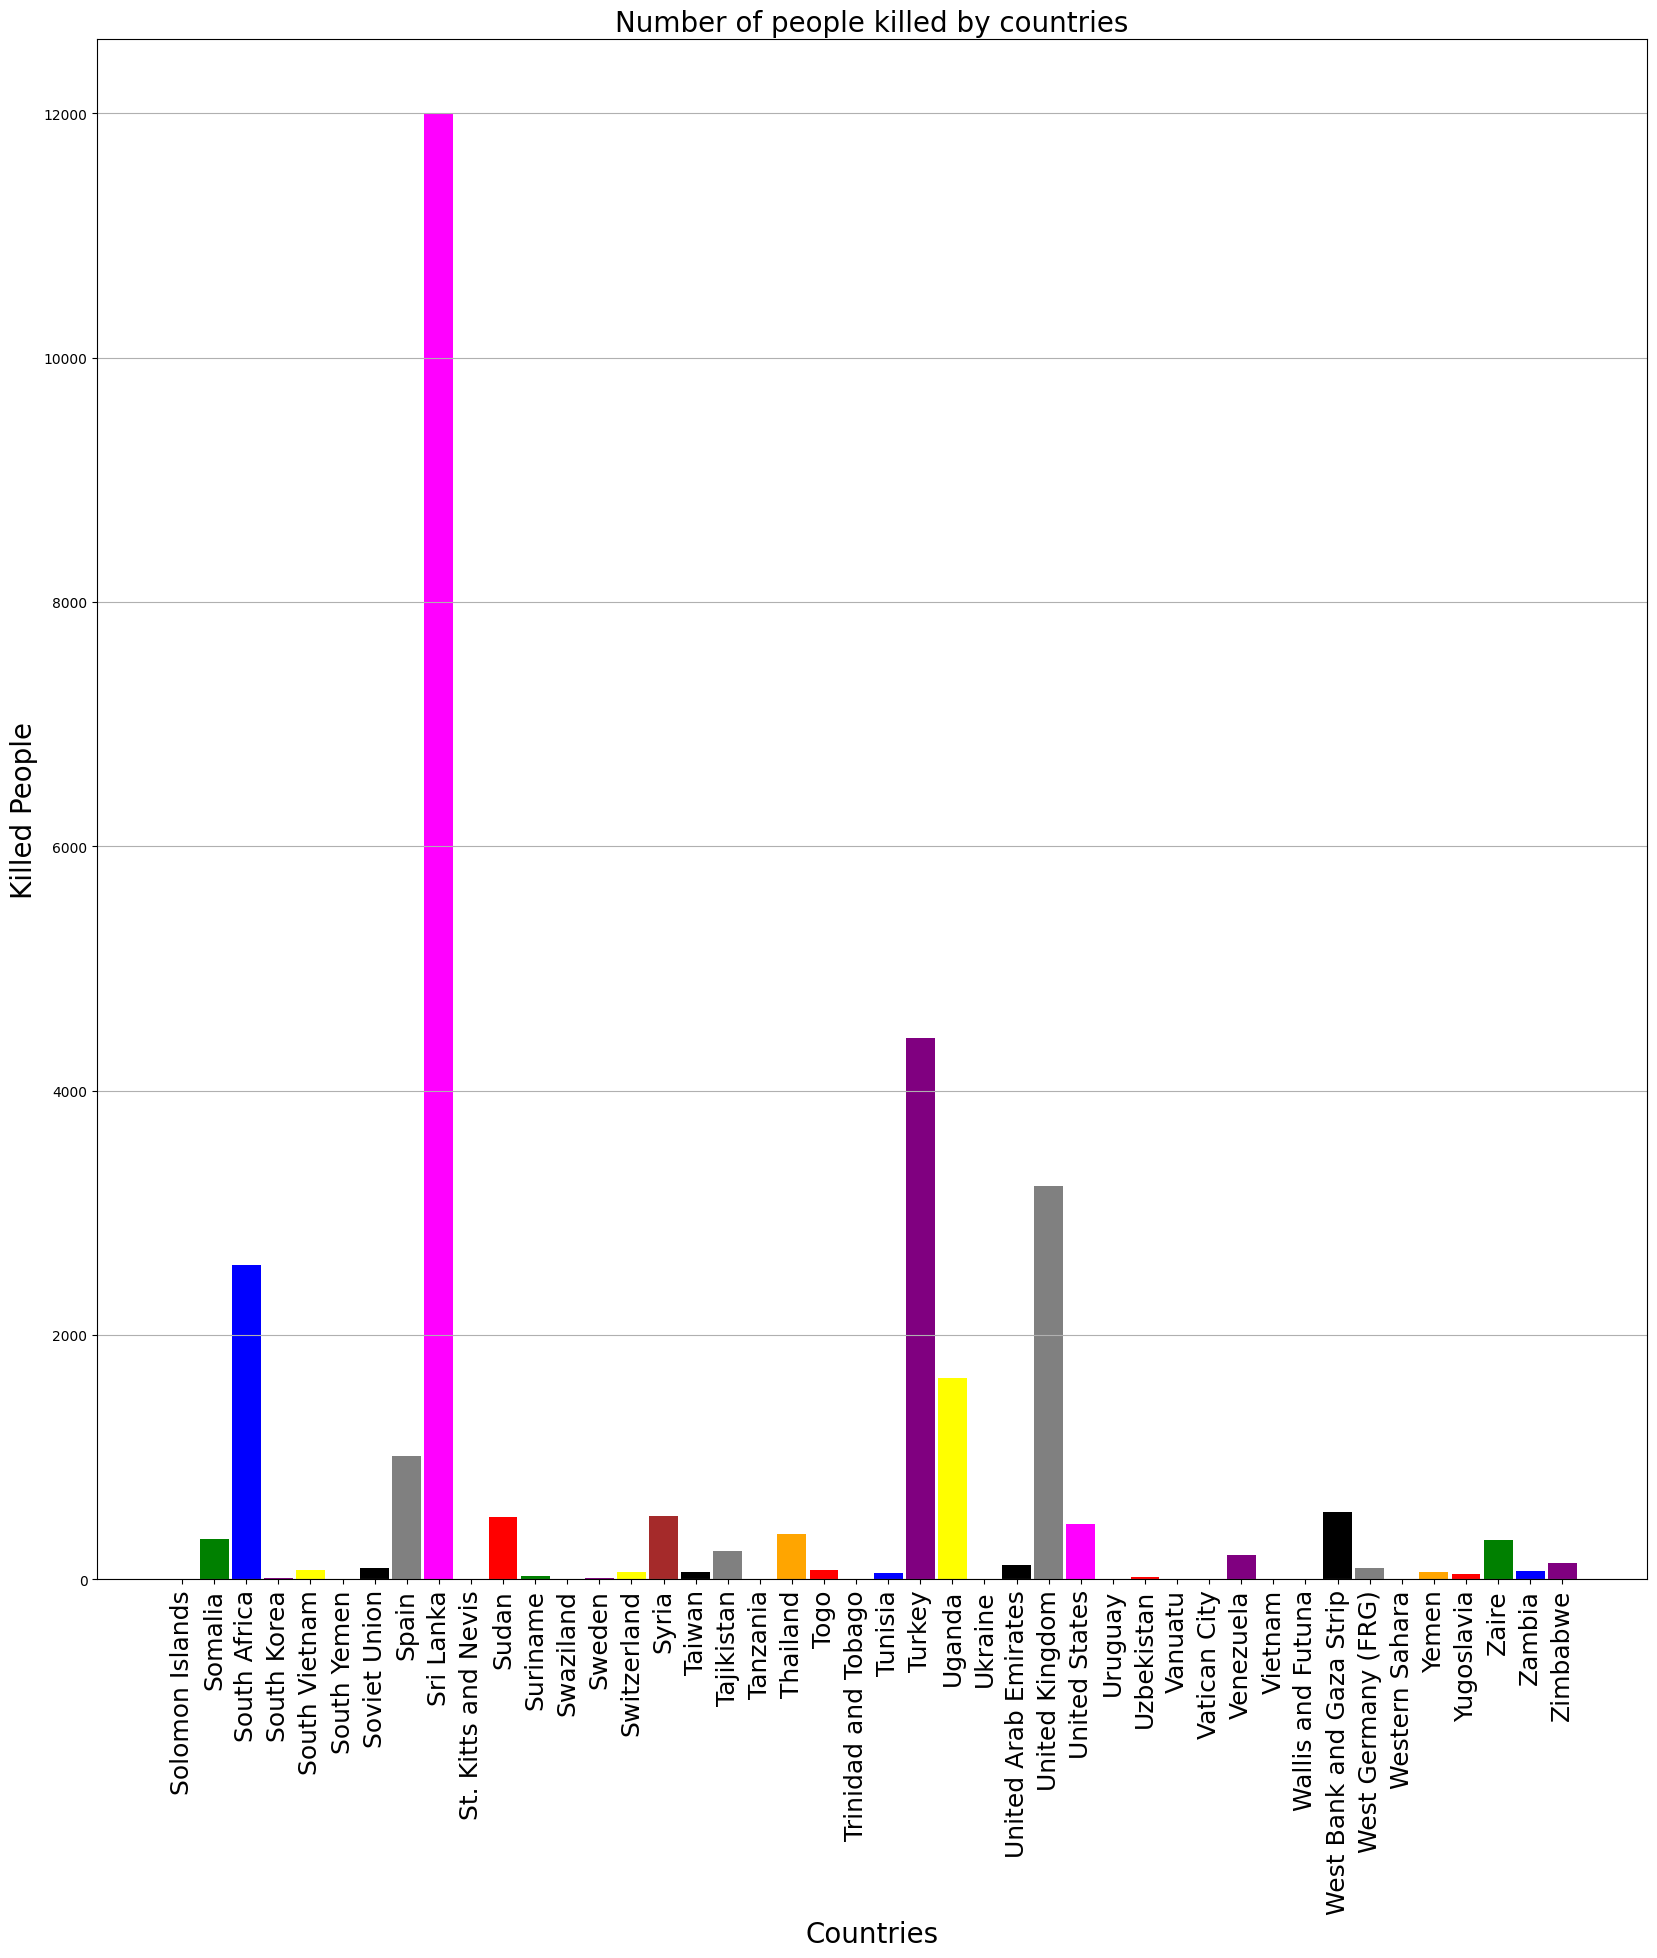

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()